<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Merging the datasets
</h1>

In [25]:
%pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [26]:
#important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import skfuzzy as fuzz

%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

In [27]:
# Load the datasets after EDA
df_flights_eda = pd.read_csv('DM_AIAI_FlightsDB_after_eda.csv') 
df_costumers_eda = pd.read_csv('DM_AIAI_CustomersDB_after_eda.csv')

In [28]:
df_flights_eda.head()

,Loyalty#,NumFlights,NumFlightsWithCompanions,PointsAccumulated,PointsRedeemed,Recency_Months,PointsRedeemRatio,FlightsWithCompanionsRatio
0,100018,225,45,53014.30,20562.8,0.0,0.387873,0.200000
1,100102,245,55,33903.96,18760.6,0.0,0.553345,0.224490
2,100140,211,51,43192.58,4896.0,1.0,0.113353,0.241706
3,100214,108,17,36453.77,12908.6,0.0,0.354109,0.157407
4,100272,181,50,42953.25,10891.4,1.0,0.253564,0.276243


In [29]:
df_costumers_eda.head()

,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Education,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Income_Class,CustomerTenure,Active_Client
0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,Bachelor,70146.0,Married,Star,2019-02-15,2021-12-31,3839.14,Standard,Non-Zero Income,1050,Active
1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,College,0.0,Divorced,Star,2019-03-09,2021-12-31,3839.61,Standard,Zero Income,1028,Active
2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,College,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,Zero Income,1274,Inactive
3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,College,0.0,Single,Star,2016-02-17,2021-12-31,3839.75,Standard,Zero Income,2144,Active
4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,Bachelor,97832.0,Married,Star,2017-10-25,2021-12-31,3842.79,2021 Promotion,Non-Zero Income,1528,Active


In [30]:
#merging both datasets
merged_df = df_flights_eda.merge(df_costumers_eda, on="Loyalty#", how = "inner" ) 

In [31]:
merged_df.head()

,Loyalty#,NumFlights,NumFlightsWithCompanions,PointsAccumulated,PointsRedeemed,Recency_Months,PointsRedeemRatio,FlightsWithCompanionsRatio,Province or State,City,...,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Income_Class,CustomerTenure,Active_Client
0,100018,225,45,53014.30,20562.8,0.0,0.387873,0.200000,Alberta,Edmonton,...,82877.0,Married,Aurora,2019-08-09,2021-12-31,7919.20,Standard,Non-Zero Income,875,Active
1,100102,245,55,33903.96,18760.6,0.0,0.553345,0.224490,Ontario,Toronto,...,0.0,Single,Nova,2016-03-09,2021-12-31,2887.74,Standard,Zero Income,2123,Active
2,100140,211,51,43192.58,4896.0,1.0,0.113353,0.241706,British Columbia,Dawson Creek,...,0.0,Divorced,Nova,2019-07-30,2021-12-31,2838.07,Standard,Zero Income,885,Active
3,100214,108,17,36453.77,12908.6,0.0,0.354109,0.157407,British Columbia,Vancouver,...,42837.0,Married,Star,2018-08-06,2021-12-31,4170.57,Standard,Non-Zero Income,1243,Active
4,100272,181,50,42953.25,10891.4,1.0,0.253564,0.276243,Ontario,Toronto,...,80979.0,Divorced,Star,2017-01-09,2021-12-31,6622.05,Standard,Non-Zero Income,1817,Active


In [32]:
merged_df.head()

,Loyalty#,NumFlights,NumFlightsWithCompanions,PointsAccumulated,PointsRedeemed,Recency_Months,PointsRedeemRatio,FlightsWithCompanionsRatio,Province or State,City,...,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Income_Class,CustomerTenure,Active_Client
0,100018,225,45,53014.30,20562.8,0.0,0.387873,0.200000,Alberta,Edmonton,...,82877.0,Married,Aurora,2019-08-09,2021-12-31,7919.20,Standard,Non-Zero Income,875,Active
1,100102,245,55,33903.96,18760.6,0.0,0.553345,0.224490,Ontario,Toronto,...,0.0,Single,Nova,2016-03-09,2021-12-31,2887.74,Standard,Zero Income,2123,Active
2,100140,211,51,43192.58,4896.0,1.0,0.113353,0.241706,British Columbia,Dawson Creek,...,0.0,Divorced,Nova,2019-07-30,2021-12-31,2838.07,Standard,Zero Income,885,Active
3,100214,108,17,36453.77,12908.6,0.0,0.354109,0.157407,British Columbia,Vancouver,...,42837.0,Married,Star,2018-08-06,2021-12-31,4170.57,Standard,Non-Zero Income,1243,Active
4,100272,181,50,42953.25,10891.4,1.0,0.253564,0.276243,Ontario,Toronto,...,80979.0,Divorced,Star,2017-01-09,2021-12-31,6622.05,Standard,Non-Zero Income,1817,Active


In [33]:
merged_df["EnrollmentDateOpening"] = pd.to_datetime(merged_df["EnrollmentDateOpening"])
merged_df["CancellationDate"] = pd.to_datetime(merged_df["CancellationDate"])
merged_df["Enroll_Year"] = merged_df["EnrollmentDateOpening"].dt.year
merged_df["Enroll_Month"] = merged_df["EnrollmentDateOpening"].dt.month

In [34]:
merged_df.set_index("Loyalty#", inplace=True)

In [35]:
merged_df.dtypes

NumFlights                             int64
NumFlightsWithCompanions               int64
PointsAccumulated                    float64
PointsRedeemed                       float64
Recency_Months                       float64
PointsRedeemRatio                    float64
FlightsWithCompanionsRatio           float64
Province or State                     object
City                                  object
Latitude                             float64
Longitude                            float64
Postal code                           object
Education                             object
Income                               float64
Marital Status                        object
LoyaltyStatus                         object
EnrollmentDateOpening         datetime64[ns]
CancellationDate              datetime64[ns]
Customer Lifetime Value              float64
EnrollmentType                        object
Income_Class                          object
CustomerTenure                         int64
Active_Cli

In [36]:
#Splitting diferent features into categorical and numerical
metric_features = [
    'NumFlights',
    'PointsAccumulated',
    'PointsRedeemed',
    'Recency_Months',
    'Customer Lifetime Value',
    'CustomerTenure'
]
non_metric_features = [
    'Education',
    'Marital Status',
    'LoyaltyStatus',
    'Income_Class',
    'Active_Client'
]
unused_features = [i for i in merged_df.columns if i not in (metric_features+non_metric_features) ]

In [37]:
print('metric_features:', metric_features)
print('non_metric_features:', non_metric_features)
print('unused_features:', unused_features)

metric_features: ['NumFlights', 'PointsAccumulated', 'PointsRedeemed', 'Recency_Months', 'Customer Lifetime Value', 'CustomerTenure']
non_metric_features: ['Education', 'Marital Status', 'LoyaltyStatus', 'Income_Class', 'Active_Client']
unused_features: ['NumFlightsWithCompanions', 'PointsRedeemRatio', 'FlightsWithCompanionsRatio', 'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code', 'Income', 'EnrollmentDateOpening', 'CancellationDate', 'EnrollmentType', 'Enroll_Year', 'Enroll_Month']


In [38]:
X_cat = OneHotEncoder(sparse_output=False).fit_transform(merged_df[non_metric_features])
X_num = StandardScaler().fit_transform(merged_df[metric_features])

Now that we finished merging our datasets, we are ready to start testing the diferent types of clustering methods, in this project we will test, Agglomerative, K-means and Fuzzy Clustering.

<h1 style="background-color: Teal; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Clustering
</h1>

### Agglomerative Clustering

In [39]:
# Compute the linkage matrix
linkage_matrix= linkage(X_num, method="ward")  # or 'single', 'complete', 'average'
distance = 'euclidean'

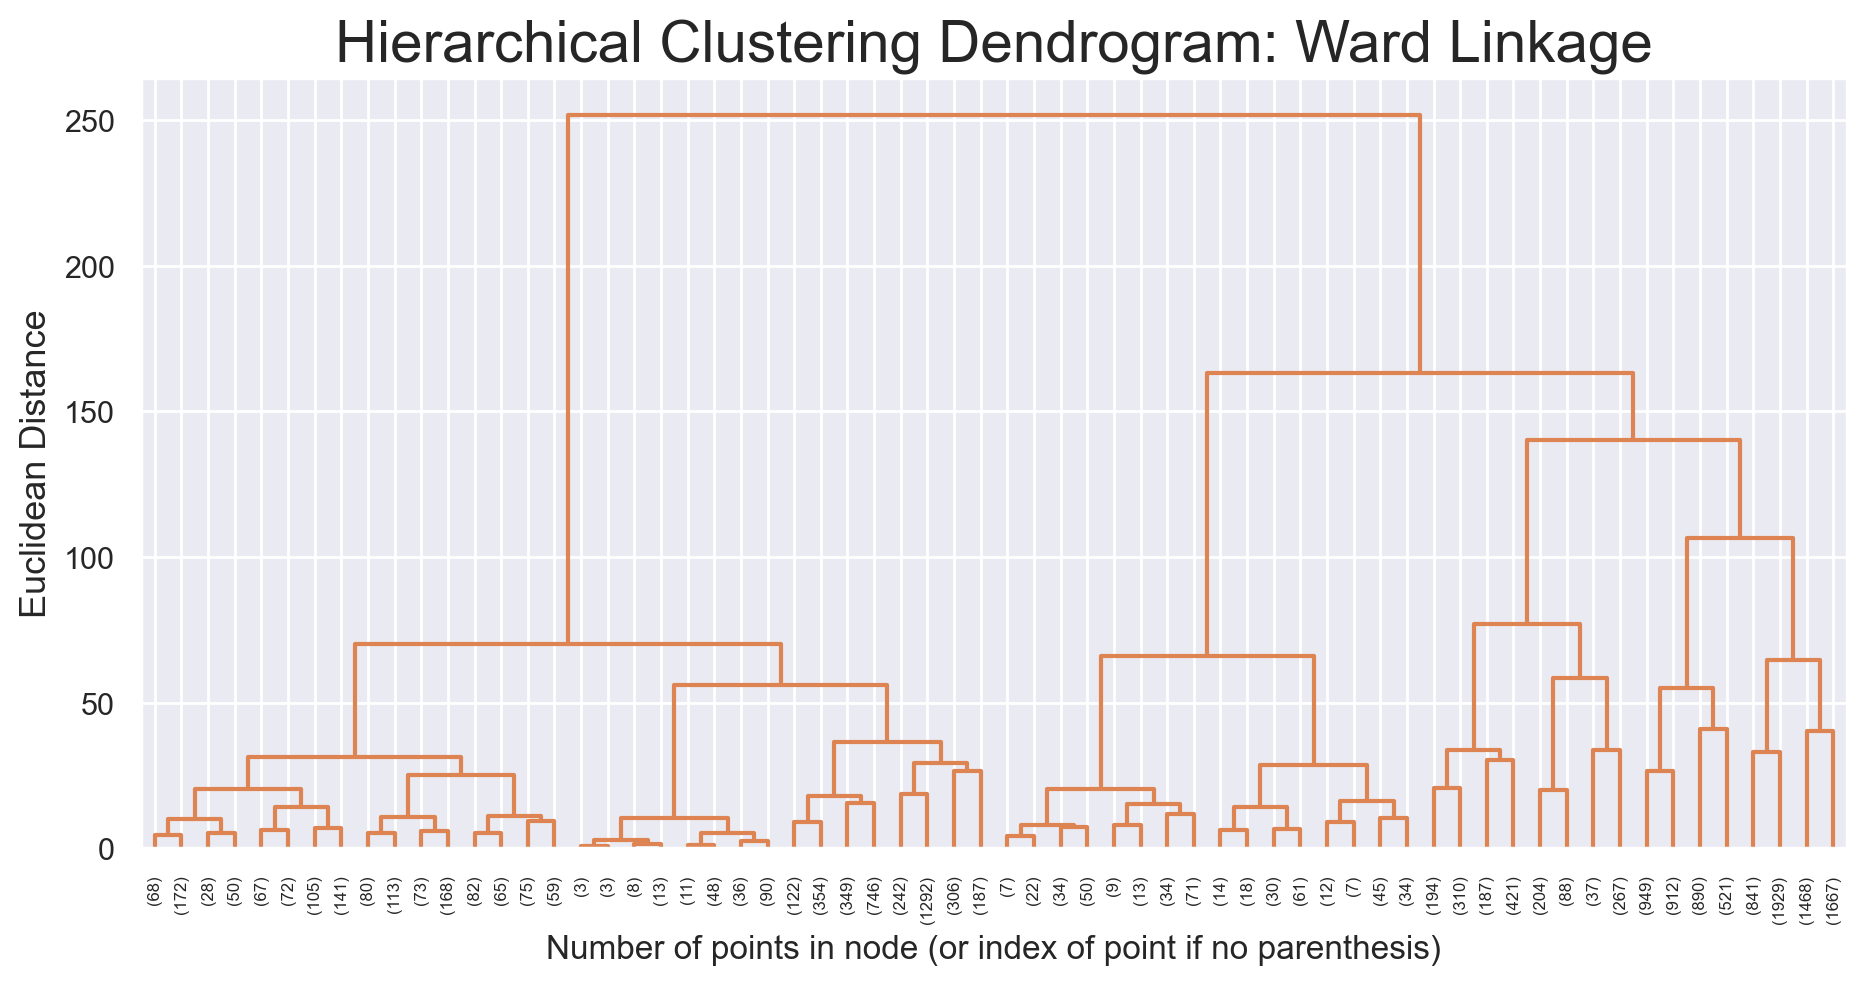

In [40]:

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
Y_THRESHOLD = 1000000 # CODE HERE
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=Y_THRESHOLD, above_threshold_color='k')
    # You can play with 'truncate_mode' and 'p' define what level the dendrogram shows
    # above_threshold_color='k' forces black color for the lines above the threshold)
plt.hlines(Y_THRESHOLD, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: Ward Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

Determination of the Optimal Number of Clusters Using a Dendrogram:

The hierarchical clustering structure was examined through a dendrogram obtained using Ward’s linkage method applied to standardized metric features. The dendrogram illustrates the successive merging of observations based on the increase in within-cluster variance.

A clear and substantial increase in linkage distance is observed at the final merge, where the distance rises sharply from approximately 160 to 250. This represents the transition from two clusters to a single cluster and indicates that the two remaining groups are highly dissimilar. According to standard hierarchical clustering criteria, this pronounced jump suggests that a **two clusters** solution provides the strongest overall separation and constitutes the most robust partition of the data.


However, an earlier but still significant increase in linkage distance can be identified at an intermediate level, approximately between distances of 130 and 160. Cutting the dendrogram at this level yields **three clusters**, which remain well separated and internally coherent.

In summary:
- **Two clusters** offer the simplest and most robust partition, maximizing separation between groups.
- **Three clusters** provide a more granular and informative segmentation while maintaining meaningful inter-cluster distances.

Therefore, while two clusters represent the primary choice based on the largest distance jump, **three clusters also constitute a valid and justifiable alternative**, particularly when a more detailed cluster interpretation is desired. Let's test with 2 and 3 clusters and compare the results.


In [41]:
#2 cluster solution
hc2 = AgglomerativeClustering(
   n_clusters=2,
    linkage='ward',
    metric='euclidean'
)

hc2_labels = hc2.fit_predict(X_num)

In [42]:
# Characterizing the 3 clusters
df_concat = pd.concat([merged_df[metric_features], 
                       pd.Series(hc2_labels, 
                                 name='labels', 
                                 index=merged_df.index)], 
                    axis=1)

df_concat.groupby('labels').mean()

,NumFlights,PointsAccumulated,PointsRedeemed,Recency_Months,Customer Lifetime Value,CustomerTenure
labels,,,,,,
0,180.922616,36835.122001,11193.875868,0.734885,8670.750377,1407.580910
1,46.221691,9285.554788,2694.583321,0.009564,6501.497636,370.201798


In [43]:
#3 cluster solution
hc3_clust = AgglomerativeClustering(
    n_clusters=3, 
    linkage='ward', 
    metric='euclidean'
    )

hc3_labels = hc3_clust.fit_predict(X_num)

In [44]:
# Characterizing the 3 clusters
df_concat = pd.concat([merged_df[metric_features], 
                       pd.Series(hc3_labels, 
                                 name='labels', 
                                 index=merged_df.index)], 
                    axis=1)

df_concat.groupby('labels').mean()

,NumFlights,PointsAccumulated,PointsRedeemed,Recency_Months,Customer Lifetime Value,CustomerTenure
labels,,,,,,
0,183.556638,37389.212845,11347.986853,0.278916,8730.046421,1428.424989
1,46.221691,9285.554788,2694.583321,0.009564,6501.497636,370.201798
2,118.728850,23752.087636,7555.051410,11.501085,7270.669176,915.416486


In [45]:

pd.crosstab(
    pd.Series(hc2_labels, name='hc2_labels', index=merged_df.index),
    pd.Series(hc3_labels, name='hc3_labels', index=merged_df.index),
    )

hc3_labels,0,1,2
hc2_labels,,,
0,10885,0,461
1,0,5228,0


In [48]:
# final cluster solution
linkage = "ward" 
distance = "euclidean"
n_clusters = 2
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)

hc_labels = hclust.fit_predict(X_num)

In [50]:
# Characterizing the final clusters

df_concat = pd.concat([
    merged_df[metric_features], 
    pd.Series(hc_labels, name='labels', index=merged_df.index)
    ], 
    axis=1)
df_concat.groupby('labels').mean().T

labels,0,1
NumFlights,180.922616,46.221691
PointsAccumulated,36835.122001,9285.554788
PointsRedeemed,11193.875868,2694.583321
Recency_Months,0.734885,0.009564
Customer Lifetime Value,8670.750377,6501.497636
CustomerTenure,1407.580910,370.201798


### KMeans


In [46]:

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


NameError: name 'X' is not defined

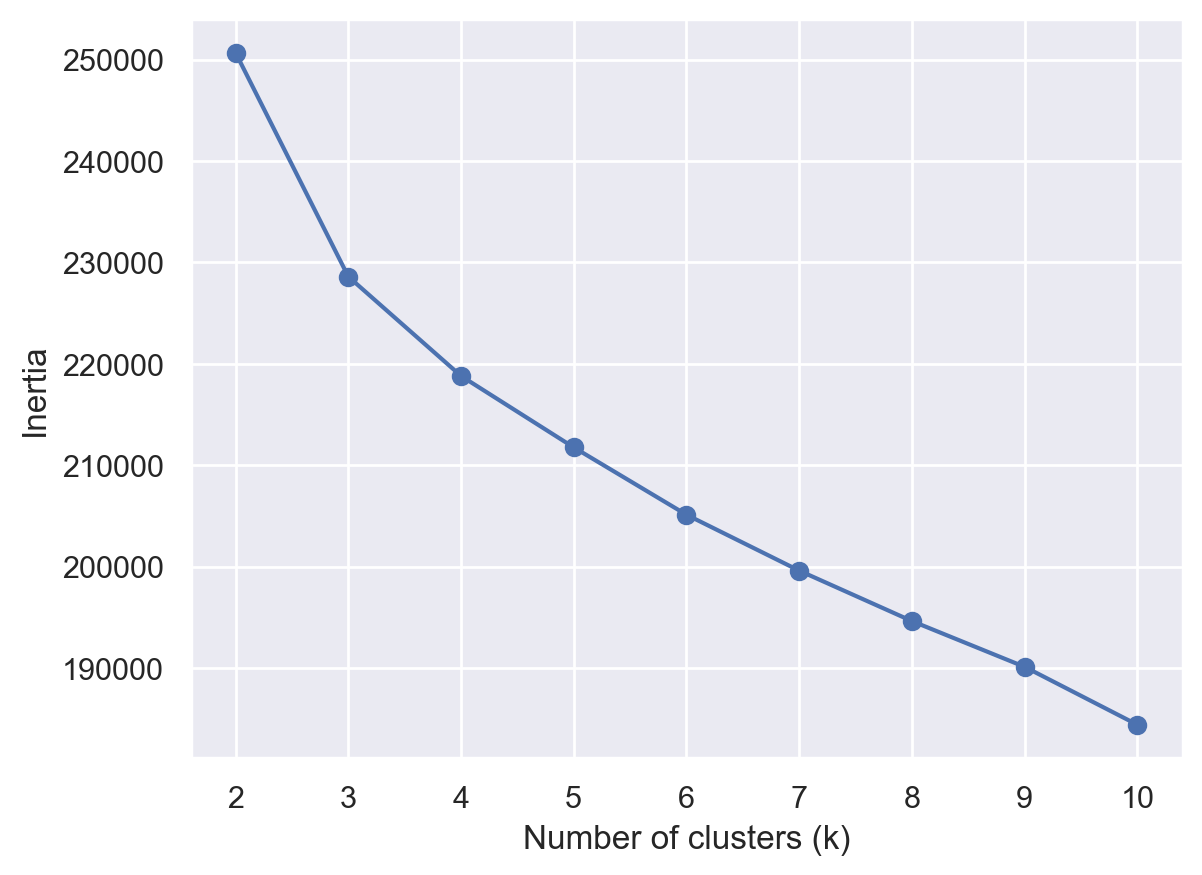

In [ ]:
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

Selection of the Optimal Number of Clusters:

To determine the optimal number of clusters, the **elbow method** was applied. This method involves plotting the within-cluster sum of squares (inertia) against the number of clusters \(k\) and identifying the point where the decrease in inertia begins to slow down significantly.

From the analysis of the inertia curve, there is a substantial reduction in inertia when increasing the number of clusters from \(k = 2\) to \(k = 4\). After \(k = 4\), the curve flattens, indicating that adding more clusters results in only marginal improvements.

Therefore, the “elbow” of the curve is identified at \(k = 4\). Based on this criterion, **four clusters** were selected as the optimal number, representing a good trade-off between model complexity and clustering performance.


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)


### Fuzzy Clustering

In [ ]:
X_cat = X_cat.copy()
X_num = X_num.copy()

XX = np.hstack([X_num, X_cat])

In [ ]:
X_fuzzy = XX.T

n_clusters = 4

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_fuzzy,
    c=n_clusters,
    m=2.0,    
    error=0.005,
    maxiter=1000,
    init=None,
    seed=42
)


In [ ]:
fpc_values = []

for c in range(2, 8):
    _, _, _, _, _, _, fpc = fuzz.cluster.cmeans(
        X_fuzzy, c=c, m=2, error=0.005, maxiter=500
    )
    fpc_values.append(fpc)


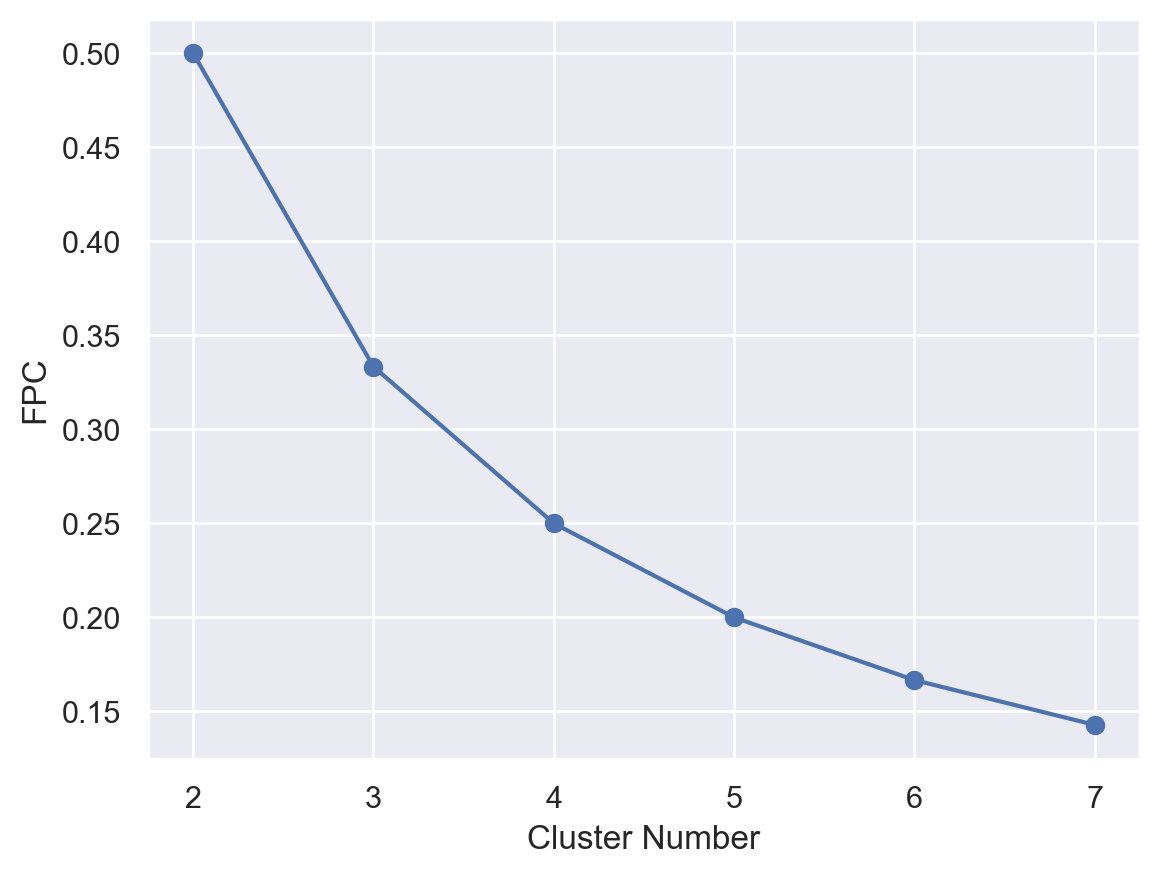

In [ ]:
plt.plot(range(2, 8), fpc_values, marker="o")
plt.xlabel("Cluster Number")
plt.ylabel("FPC")
plt.show()


### Comparing different types of clusters

In [ ]:
merged_df['cluster'] = labels_hc3
merged_df["Kmeans"] = kmeans.fit_predict(X)
merged_df["FuzzyCluster"] = np.argmax(u, axis=0)
merged_df["Membership_Strength"] = np.max(u, axis=0)

In [ ]:
cluster_comparison = pd.DataFrame({
    'Hierarchical': merged_df['cluster'], 'KMeans': merged_df['Kmeans'], 'Fuzzy': merged_df['FuzzyCluster']
})

In [ ]:
cluster_comparison

,Hierarchical,KMeans,Fuzzy
Loyalty#,,,
100018,2,0,1
100102,0,3,1
100140,2,0,1
100214,2,0,3
100272,0,3,1
...,...,...,...
999902,0,3,1
999911,1,1,3
999940,0,2,3
